In [1]:
from SYK_fft import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ConformalAnalytical import *

In [2]:
Nbig = int(2**16)
err = 1e-4

beta = 5000.
mu = 0.3
J = 1.

omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
nu = (2 * np.arange(Nbig) - Nbig ) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

$$L_0(x) = \frac{1}{\pi}\frac{\frac{1}{2}\Gamma}{x^2 + \left(\frac{1}{2}\Gamma\right)^2}$$

$$G(i\omega_n) = \frac{1}{i\omega_n + \mu(1-e^{-\frac{\Gamma|\omega|}{2}}) -\Sigma(\omega_n)}$$

$$ \Sigma(\tau) = -J^2 G^2(\tau)G(-\tau) + \mu L_0(\tau)$$

choosing $\Gamma$ as 10 lattice spacings in $\tau$-space

In [3]:
Gtau = -0.5*np.ones(Nbig) 
#Gtau = Freq2TimeF(1/(1j*omega + mu),Nbig,beta)
''' It's crucial to start with this, even changing the sign here is enough to make the solution 
fall into an unwanted one'''

def L0(x,Gamma):
    pref = Gamma/(2*np.pi)
    return pref * 1/(x**2 + (Gamma/2)**2)


itern = 0
diff = 1.
x = 0.5
dtau = tau[10] - tau[9]
Gamma = 10*dtau


while(diff>err):
    itern+=1
    diffold = diff
    
    oldGtau = 1.0*Gtau
    oldGomega = Time2FreqF(oldGtau,Nbig,beta)
    
    Sigmatau = J**2 * Gtau**2 * Gtau[::-1] + mu*L0(tau,Gamma)
    Sigmaomega = Time2FreqF(Sigmatau,Nbig,beta)
    
    #Gomega = x*(1./(1j*omega + mu*(1-np.exp(-Gamma*np.abs(omega)/2)) - Sigmaomega)) + (1-x)*oldGomega
    Gomega = x*(1./(1j*omega + mu - Sigmaomega)) + (1-x)*oldGomega

    Gtau = Freq2TimeF(Gomega,Nbig,beta)

    diff = np. sqrt((1.0/Nbig) * np.sum((np.abs(Gtau-oldGtau))**2)) #changed
    if diff>diffold:
        x/=2


Q = 0.5*(Gtau[0] - Gtau[-1])
print("itern = ",itern," , diff = ", diff, " , x = ", x)
print("Q = ", np.real(Q))

itern =  13  , diff =  5.361770792709051e-05  , x =  0.125
Q =  0.20081401990655948


Text(0.5, 1.0, 'Q = 0.201 ')

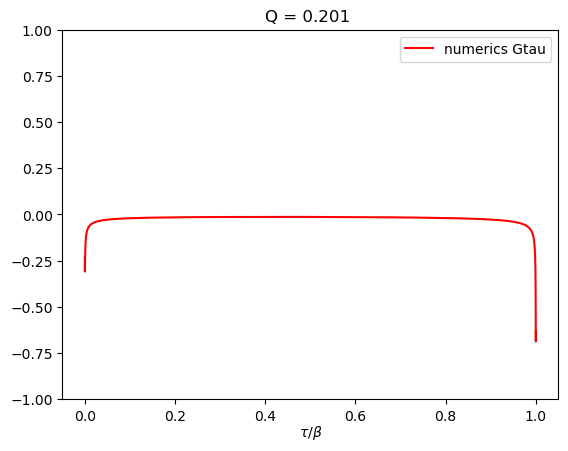

In [4]:
plt.plot(tau/beta, np.real(Gtau), 'r', label = 'numerics Gtau')
#plt.plot(tau/beta, np.real(Gconftau), 'b--', label = 'analytical Gtau' )
plt.ylim(-1,1)
plt.xlabel(r'$\tau/\beta$',labelpad = 0)
plt.legend()
plt.title('Q = %.3f ' %np.real(Q) )

Text(0.5, 1.0, '$\\mu = $ 0.3 ;  Q = 0.201')

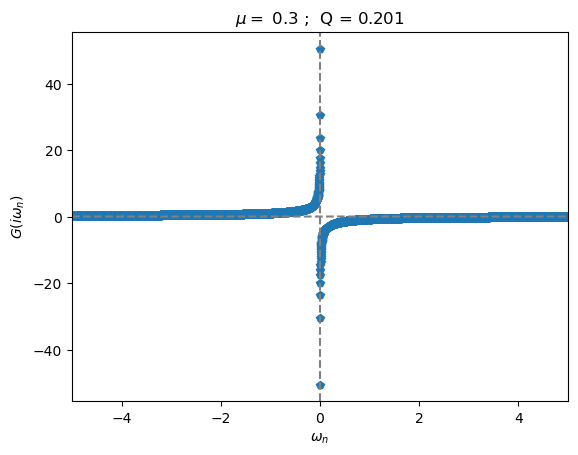

In [5]:
plt.plot(omega,np.imag(Gomega),'p')
plt.plot(omega,np.zeros_like(omega), color = 'gray', linestyle = '--')
plt.axvline(0,color='gray',linestyle = '--')
plt.xlim(-5,5)
plt.xlabel(r'$\omega_n$')
plt.ylabel(r'$G(i\omega_n)$')
plt.title(r'$\mu = $ ' + str(mu) + ' ;  Q = %.3f' %np.real(Q))

<Figure size 600x600 with 0 Axes>

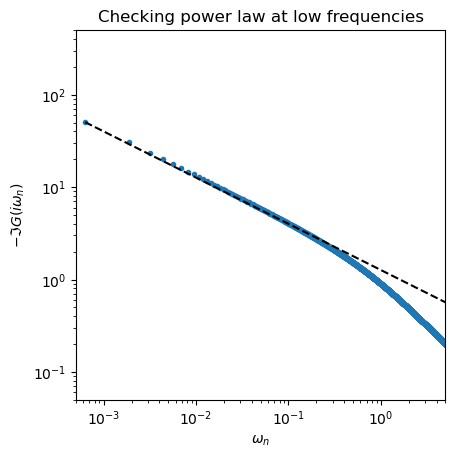

<Figure size 600x600 with 0 Axes>

In [6]:
plt.loglog(omega[Nbig//2:],-np.imag(Gomega[Nbig//2:]),'.')
fudfac = -np.imag(Gomega[Nbig//2])/omega[Nbig//2]**(-0.5)
plt.loglog(omega[Nbig//2:],fudfac* (omega[Nbig//2:]**(-0.5)),'k--')
plt.title('Checking power law at low frequencies')
plt.xlabel(r'$\omega_n$')
plt.ylabel(r'$-\Im{G(i\omega_n)}$')
plt.xlim(5e-4,5e0)
plt.ylim(5e-2,5e2)
plt.gca().set_aspect('equal')
plt.figure(figsize=(6,6))

Text(0.5, 1.0, '$\\mu = $ 0.3 ;  $Re{\\Sigma(\\omega \\rightarrow 0^+)}$  =  0.29557797181975465')

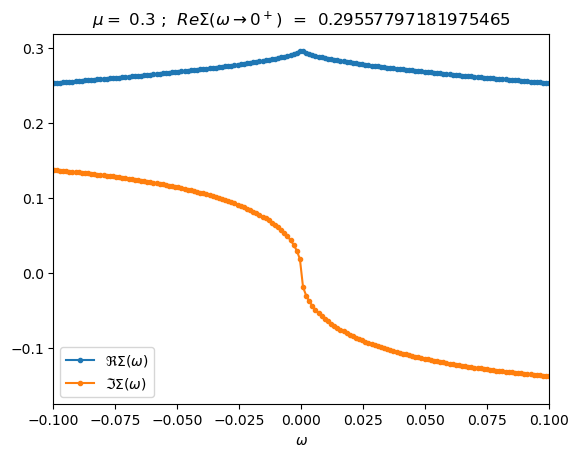

In [7]:
plt.plot(omega,np.real(Sigmaomega),'.-',label=r'$\Re{\Sigma(\omega)}$')
plt.plot(omega,np.imag(Sigmaomega),'.-',label=r'$\Im{\Sigma(\omega)}$')
plt.xlim(-0.1,0.1)
plt.xlabel(r'$\omega$')
plt.legend()
plt.title(r'$\mu = $ ' + str(mu) + r' ;  $Re{\Sigma(\omega \rightarrow 0^+)}$  =  ' + str(np.real(Sigmaomega[Nbig//2])))